In [1]:
### Step-lenght
### sum of angles
### Number of spikes

In [3]:
from src.utile import *
import numpy as np
import matplotlib.pyplot as plt
import time
import math
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
cameras = get_camera_names()
days = get_days_in_order()
camera, day = cameras[0], days[0]
print(camera, day)
batches = csv_of_the_day(camera, day, drop_out_of_scope=True)[1]

def mean_sd(array):
    mean = np.mean(array)
    sd = np.std(array)
    return mean, sd

def calc_length_of_steps(df):
    ysq = (df.shift(1).y - df.y)**2
    xsq = (df.shift(1).x - df.x)**2
    c=np.sqrt(ysq[1:] + xsq[1:])
    return c

def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    norm = np.linalg.norm(vector)
    if norm == 0:
        return np.array([np.nan, np.nan])
    return vector / norm

def determinant(v,w):
    """ Determinant of two vectors. """
    return v[0]*w[1]-v[1]*w[0]

def direction_angle(v,w):
    """ Return the angle between v,w anti clockwise from direction v to m. """
    cos = np.dot(v,w)
    r = np.arccos(np.clip(cos, -1, 1))
    det = determinant(v,w)
    if det < 0: 
        return r
    else:
        return -r
    
def angle(v,w):
    cos = np.dot(v,w)
    return np.arccos(np.clip(cos, -1, 1))

def sum_of_angles(df):
    y = (df.shift(1).ypx - df.ypx)
    x = (df.shift(1).xpx - df.xpx)
    if len(x) == 0:
        return 0
    u = unit_vector([x[1],y[1]])
    sum_alpha = 0
    for i in range(2,y.size):
        v = unit_vector([x[i],y[i]])
        if np.any(np.isnan(v)):
            continue
        if np.any(np.isnan(u)):
            u = v
            continue
        alpha = direction_angle(u,v)
        sum_alpha += alpha
        u = v
    return sum_alpha

#mean_sd()


23520289 20210910_1550


In [74]:
for b in batches:
    c = calc_length_of_steps(b)
    m, sa = mean_sd(c), sum_of_angles(b)
    print(m, sa, len(b))

(0.37466555459917195, 1.2192206489892274) -267.0342336162735 6737
(0.8463271637012068, 0.5593609892478465) -326.140291042752 9998
(0.7679714910613318, 0.8643009623256221) -464.55691634854713 9999
(0.8192560318665729, 1.0638047232779972) -431.106016428941 8405


In [64]:
v = unit_vector([0, 1])
u = unit_vector([1,0])
alpha2 = angle(u,v)

cos, alpha1, alpha2, direction_angle(u, v)

(0.0, 1.5707963267948966, 1.5707963267948966, -1.5707963267948966)

In [226]:
np.arccos(np.dot([-0.70710678, -0.70710678],[-0.70710678, -0.70710678]) )

8.192756674004925e-05

In [170]:
v = [1,1]
v_norm = np.linalg.norm(v)
u = [0.1,1]
u_norm = u = np.linalg.norm(u)
alpha = np.arccos(np.dot([0.3,1],[1,1])/(1*v_norm))
a = np.array([1,2,3,4])
a.size

[0, 1, 2, 3]

3.141592653589793

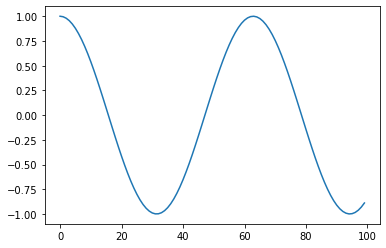

In [148]:
plt.plot([np.cos(x) for x in np.arange(0,10,0.1)])
np.arccos(0)

In [125]:

mean_sd(c), len(c)

((0.5853014403137901, 1.0988627313719792), 6740)

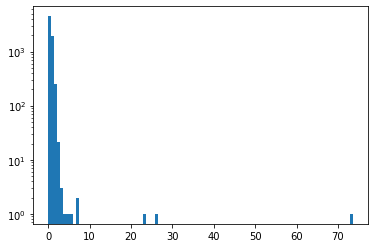

In [129]:
h=plt.hist(c,log=True, bins=100)